In [36]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import re

def process_string(string):
    """
    Retrieve L1, and L2's from the directory name (a string)
    """
    # Find all occurrences of L1m, L1p, L1mask with their values
    matches = re.findall(r'(L1\w+)=([^_]+)', string)
    result = []
    for key, value in matches:
        # If the value is False, replace L1 with L2
        if value == 'False':
            result.append(key.replace('L1', 'L2'))
        else:
            result.append(key)
    return ' '.join(result)

def load_images_from_roots(root_folders, category):
    """
    Load the first image from each subfolder in the provided category folder.
    Do this for all experiments
    """
    images = {}
    for root_folder in root_folders:
        root_name = os.path.basename(root_folder) # Use folder name for labeling

        # Determine the name of the column
        if 'drag_bench_data' in root_name:
            processed_name = 'Original'
        else:
            processed_name = process_string(root_name)

        images[processed_name] = []  # Create the dictionary key with the processed name
        category_path = os.path.join(root_folder, category)
        for subfolder in os.listdir(category_path):
            subfolder_path = os.path.join(category_path, subfolder)
            if os.path.isdir(subfolder_path):
                # Find the first image in the subfolder
                for file in os.listdir(subfolder_path):
                    if file.lower().endswith(('png', 'jpg', 'jpeg')):
                        images[processed_name].append(os.path.join(subfolder_path, file))
                        break
    return images

def display_images_in_grid(images_dict, save_path=None):
    """
    Display images in a grid, where each column corresponds to an experiment.
    Save the grid as a .jpg file if save_path is provided.
    """
    n_rows = max(len(images) for images in images_dict.values())  # Max number of images in a root folder
    n_cols = len(images_dict)  # Number of root folders

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    fig.tight_layout(pad=3)

    if n_rows == 1:
        axes = [axes]
    if n_cols == 1:
        axes = [[ax] for ax in axes]

    for col, (root_name, image_paths) in enumerate(images_dict.items()):
        for row in range(n_rows):
            ax = axes[row][col] if n_rows > 1 else axes[0][col]
            ax.axis('off')
            if row < len(image_paths):
                img = Image.open(image_paths[row])
                ax.imshow(img)
            if row == 0:
                ax.set_title(root_name, fontsize=20, fontweight='bold')

    if save_path:
        plt.savefig(save_path, format='jpg')  # Save the figure as a JPG
        print(f"Saved grid to {save_path}")

    plt.close(fig)  # Close the plot to free up memory

Processing category: art_work
Saved grid to img/art_work.jpg
Processing category: land_scape
Saved grid to img/land_scape.jpg
Processing category: building_city_view
Saved grid to img/building_city_view.jpg
Processing category: building_countryside_view
Saved grid to img/building_countryside_view.jpg
Processing category: animals


KeyboardInterrupt: 

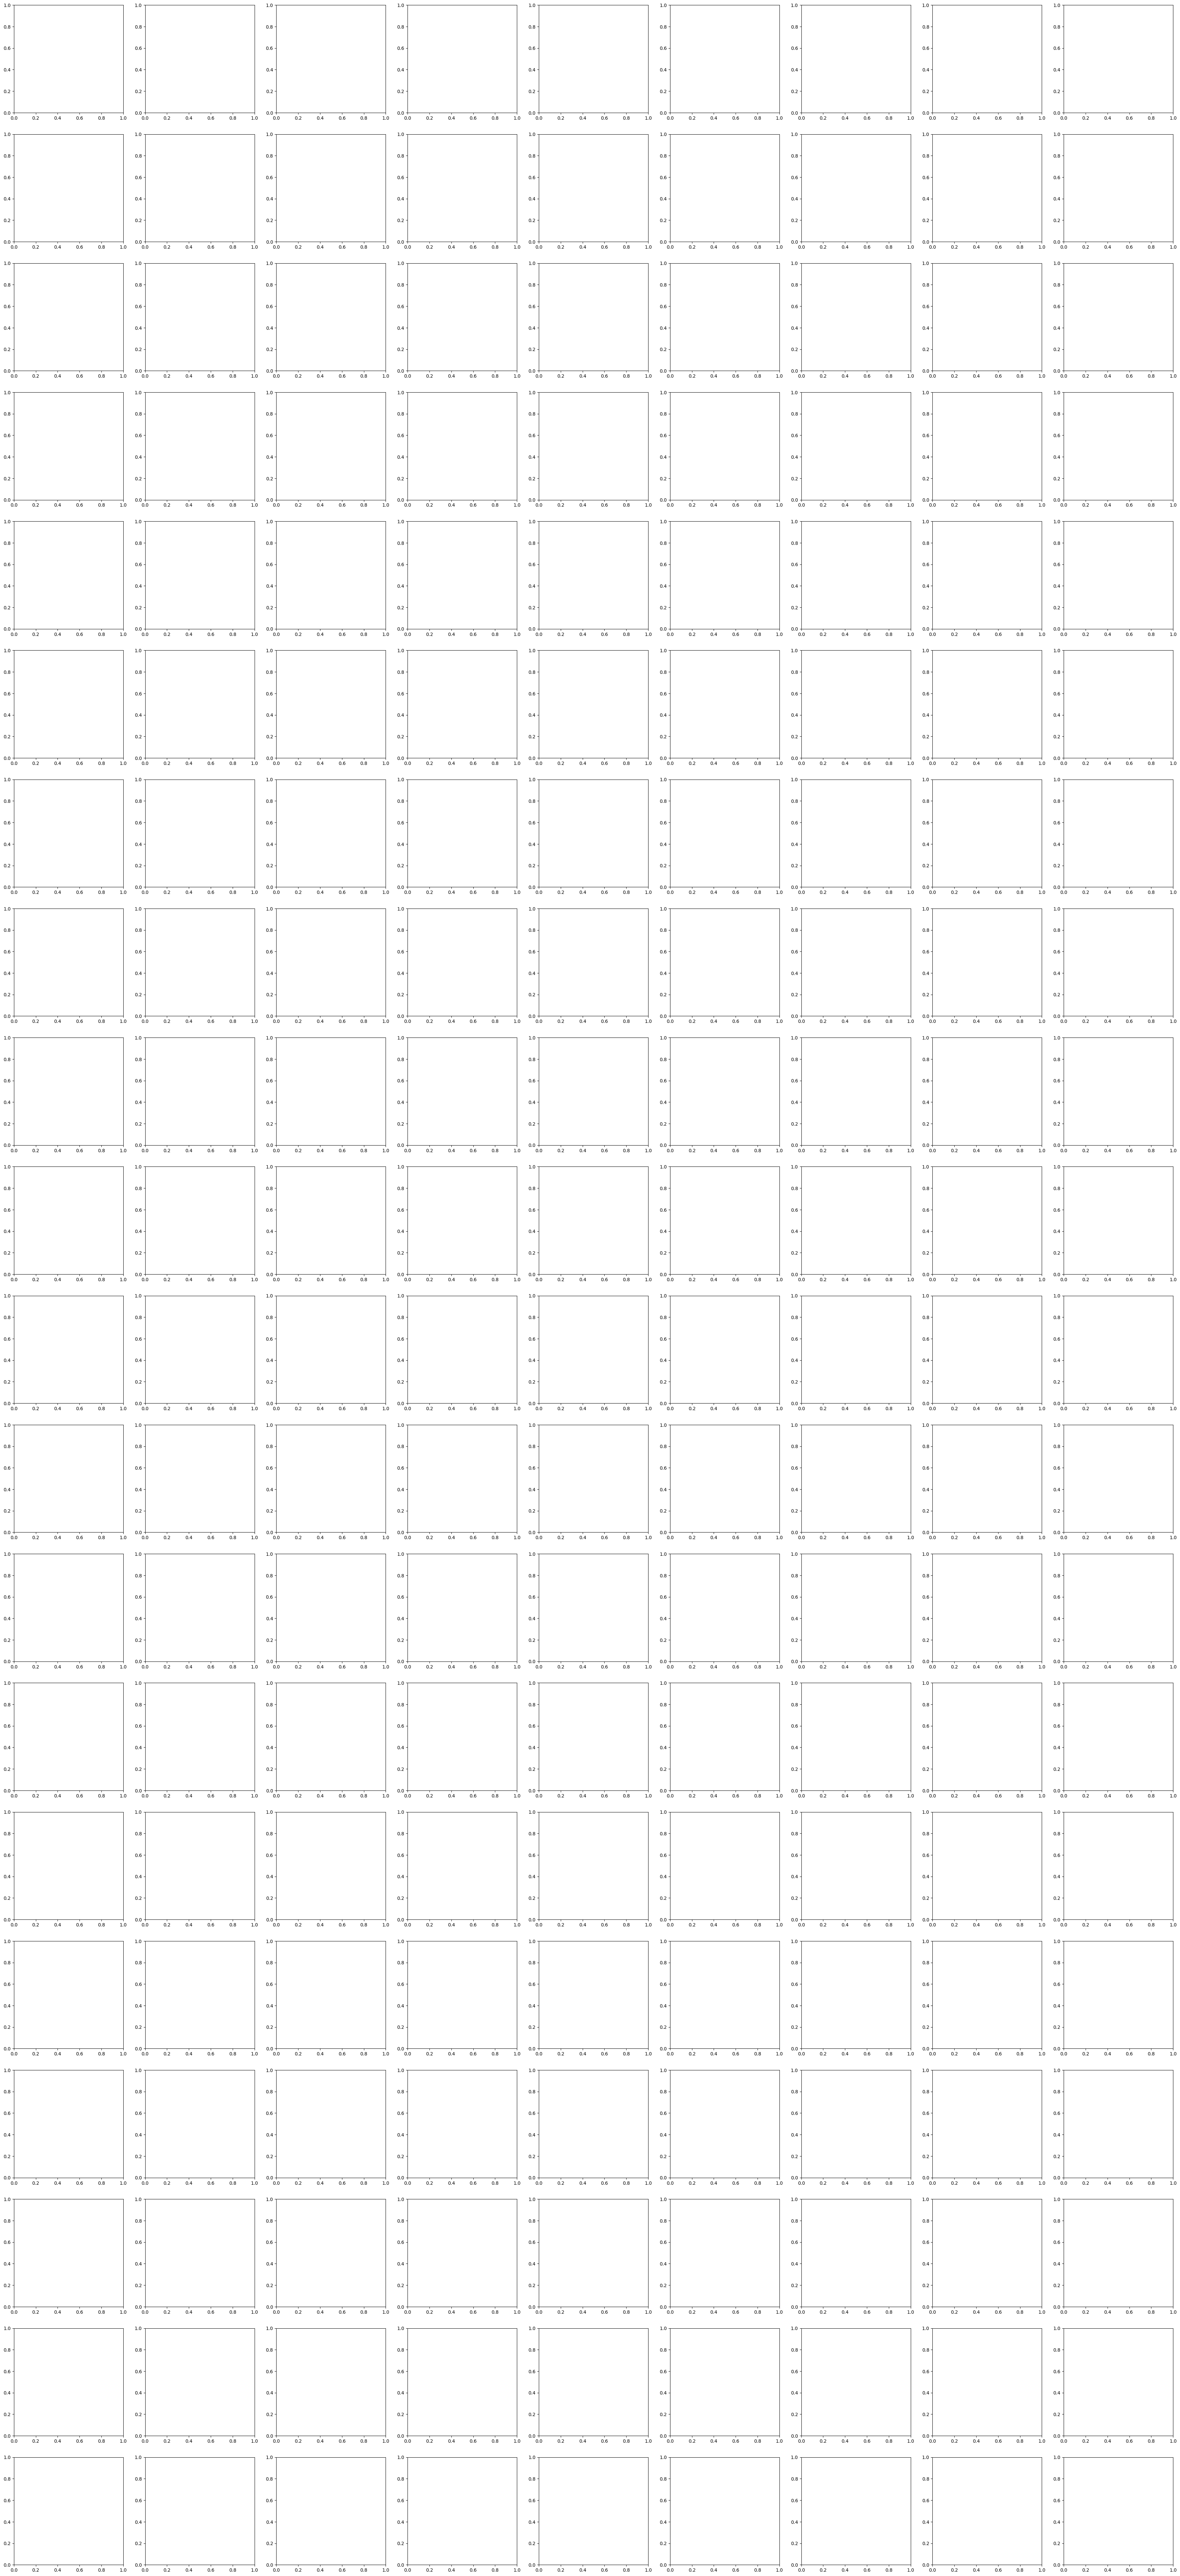

In [35]:
# List of root folder paths
root_folders = [
    '../drag_bench_data',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=False_L1mask=False',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=False_L1mask=True',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=True_L1mask=False',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=False_L1p=True_L1mask=True',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=False_L1mask=False',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=False_L1mask=True',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=True_L1mask=False',
    '../L1_L2_experiments/drag_diffusion_res_80_0.7_0.01_3_L1m=True_L1p=True_L1mask=True'
]

# Directory to save the result images
output_dir = "img"
os.makedirs(output_dir, exist_ok=True)

# Process each category and save the results
all_categories = [
    'art_work',
    'land_scape',
    'building_city_view',
    'building_countryside_view',
    'animals',
    'human_head',
    'human_upper_body',
    'human_full_body',
    'interior_design',
    'other_objects',
]

for category in all_categories:
    print(f"Processing category: {category}")
    # Load images for the current category
    images_dict = load_images_from_roots(root_folders, category)
    # Save the grid as a jpg file
    save_path = os.path.join(output_dir, f"{category}.jpg")
    display_images_in_grid(images_dict, save_path=save_path)
